In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs

In [83]:
def H(x): return np.heaviside(x, 1).astype(np.int)

In [84]:
class Rosenblatt():

    def __init__(self):
        self.weights = None
        self.bias = None

    def decision_function(self, X):
        scores = X.dot(self.weights) + self.bias
        return scores

    def predict(self, X):
        return H(self.decision_function(X))

    def fit(self, X, y, maxiter=1000):

        self.weights = np.zeros((X.shape[1], ))
        self.bias = 0.0

        errors = list()

        for _ in range(maxiter):
            for xi, y_true in zip(X, y):
                error = y_true - self.predict(xi.reshape((1, -1)))  
                if error != 0:
                    self.weights += error * xi
                    self.bias += error
            errors.append( abs(y - self.predict(X)).sum() )
            if errors[-1] == 0:
                break
        return self

In [78]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0,
    class_sep=1.5,
    random_state=2181311,
)

# X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=4112)

In [85]:
model = Rosenblatt()
model.fit(X, y)

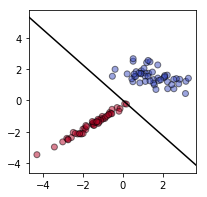

In [92]:
_, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(
    X[:, 0], X[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolors="k",
    alpha=0.5,
)

def decision(x): return -(model.weights[0] * x + model.bias)/model.weights[1]

x = np.linspace(*ax.get_xlim())
ax.plot(x, decision(x), color="k")
ax.set_xlim(x.min(), x.max());
plt.show()